In [81]:
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [27]:
#Load the api client id and secret from file
f = open('.apikeys.json')
apikeys = json.load(f)
CLIENT_ID = apikeys['clientId']
CLIENT_SECRET = apikeys['clientSecret']

In [26]:
#get access token
AUTH_URL = 'https://accounts.spotify.com/api/token'

auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': CLIENT_ID,
    'client_secret': CLIENT_SECRET,
})

# convert the response to JSON
auth_response_data = auth_response.json()

# save the access token
access_token = auth_response_data['access_token']

In [15]:
headers = {
    'Authorization': f'Bearer {access_token}'
}

In [43]:
# base URL of all Spotify API endpoints
BASE_URL = 'https://api.spotify.com/v1/'

# Track ID from the URI
track_id = '3TBO0QhrrrOiAZIzRlTUfQ'

# actual GET request with proper header
r = requests.get(BASE_URL + 'audio-analysis/' + track_id, headers=headers)

In [44]:
r = r.json()
r.keys()

dict_keys(['meta', 'track', 'bars', 'beats', 'sections', 'segments', 'tatums'])

In [133]:
test_sections = pd.DataFrame(r['segments'])

In [134]:
test_sections.keys()

Index(['start', 'duration', 'confidence', 'loudness_start',
       'loudness_max_time', 'loudness_max', 'loudness_end', 'pitches',
       'timbre'],
      dtype='object')

In [135]:
test_sections.pitches

0       [0.293, 1.0, 0.578, 0.772, 0.691, 0.363, 0.315...
1       [0.042, 0.122, 0.735, 0.185, 0.169, 0.043, 0.0...
2       [0.03, 0.093, 0.57, 0.15, 0.133, 0.036, 0.019,...
3       [0.029, 0.109, 0.773, 0.203, 0.234, 0.046, 0.0...
4       [0.045, 0.095, 0.852, 0.209, 0.25, 0.042, 0.03...
                              ...                        
1810    [0.059, 0.087, 1.0, 0.126, 0.28, 0.042, 0.018,...
1811    [0.04, 0.06, 0.689, 0.137, 0.333, 0.029, 0.019...
1812    [0.095, 0.14, 1.0, 0.169, 0.304, 0.039, 0.021,...
1813    [0.034, 0.106, 0.702, 0.099, 0.168, 0.02, 0.01...
1814    [0.113, 0.116, 1.0, 0.213, 0.305, 0.029, 0.026...
Name: pitches, Length: 1815, dtype: object

In [136]:
#check to see if all section pitches have lists that are all the same length
length = 0
for i, section in enumerate(test_sections.pitches):
    if i == 0:
        length = len(section)
    else:
        if length == len(section):
            continue
        else:
            print('not the same length')
    print('all the same length')

all the same length


In [137]:

pitches = []
for section in test_sections.pitches:
    pitches.append(section)

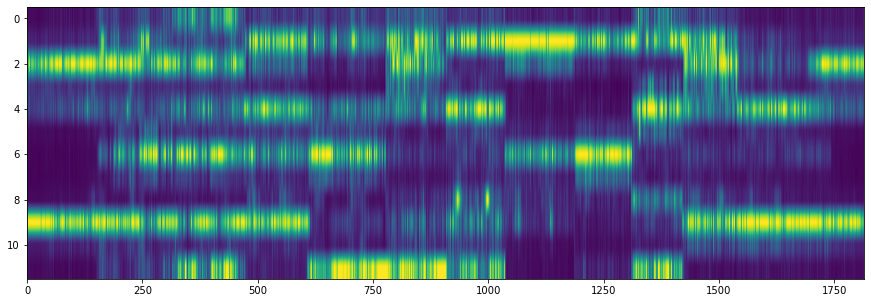

In [138]:
pitch_array = np.array(pitches)

fig, ax = plt.subplots(figsize=(15,5))
ax.imshow(pitch_array.T, aspect='auto')
